In [65]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os



import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

In [76]:
df_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,  delimiter='|', on_bad_lines='skip')
    
    base = os.path.basename(filename)  #
    transaction_id = int(base.split('_')[-1].split('.')[0]) 
    df['transaction_id'] = transaction_id  
    
    df_list.append(df)
    

df_list = [df.dropna(axis=1, how='all') for df in df_list]

transactions= pd.concat(df_list, axis=0, ignore_index=True)

In [77]:
transactions.shape

(4260904, 11)

In [78]:
transactions.head(1)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,transaction_id
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,0


In [79]:
customers.head(1)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787


df union

In [80]:
df_final = transactions.merge(customers.drop('acct_num', axis=1), on='cc_num')

In [81]:
df_final.head(2)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,transaction_id,ssn,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,0,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,0,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03


In [82]:
df_final.shape

(4260904, 24)

## EDA

<Axes: xlabel='Count', ylabel='unix_time'>

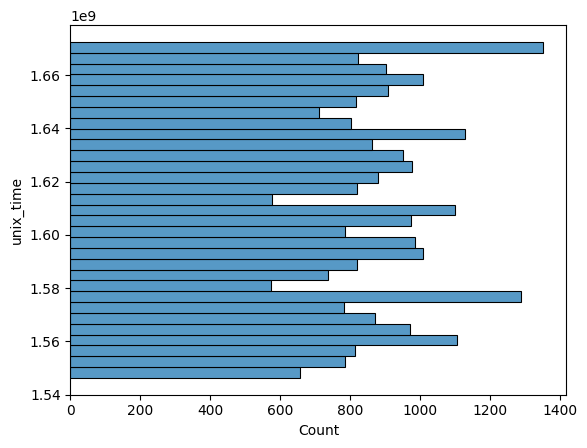

In [83]:
sns.histplot(data=df_final, y=df.unix_time)

In [84]:
df_final['unix_time'] = pd.to_datetime(df_final['unix_time'], unit='s')

In [85]:
date = '2022-06-01'

In [86]:
df = df_final[(df_final['unix_time'] >= '2022-06-01')].reset_index(drop=True).copy(deep = True)

In [87]:
df.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,transaction_id,ssn,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,4218196001337,888022315787,b45d68c71229562b6fd243d91b97a742,2022-10-25 12:12:02,personal_care,97.33,0,Townsend-Moore,40.852780,-75.820295,0,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
1,4218196001337,888022315787,0f0e9a35ea0161db8140010bb1e92b97,2022-11-15 03:54:44,personal_care,131.27,0,Miller Inc,40.959699,-75.655453,0,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
2,4218196001337,888022315787,c6a4b5c5831983cc8fd08200e31e7618,2022-12-24 02:32:20,travel,65.00,0,Hays-Bowen,40.394782,-74.705600,0,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
3,4218196001337,888022315787,202f01c021fe6ec0e7d0b3d67356844c,2022-12-06 05:51:09,travel,98.60,0,Sherman Inc,41.034767,-75.910049,0,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
4,4218196001337,888022315787,f3c46d60210ff65afe002f36f5085726,2022-08-27 06:16:32,personal_care,57.98,0,"Morgan, Hunter and Wood",39.833264,-74.310873,0,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03


In [88]:
df.to_csv('final.csv', sep=',')

<Axes: xlabel='Count', ylabel='unix_time'>

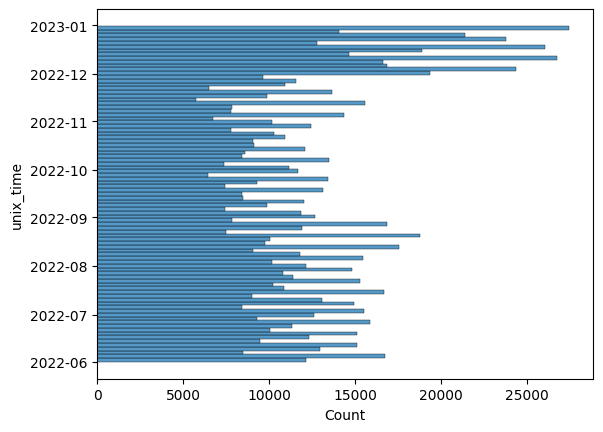

In [46]:
sns.histplot(data=df, y=df.unix_time)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117411 entries, 0 to 1117410
Data columns (total 24 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   cc_num          1117411 non-null  int64         
 1   acct_num        1117411 non-null  int64         
 2   trans_num       1117411 non-null  object        
 3   unix_time       1117411 non-null  datetime64[ns]
 4   category        1117411 non-null  object        
 5   amt             1117411 non-null  float64       
 6   is_fraud        1117411 non-null  int64         
 7   merchant        1117411 non-null  object        
 8   merch_lat       1117411 non-null  float64       
 9   merch_long      1117411 non-null  float64       
 10  transaction_id  1117411 non-null  int64         
 11  ssn             1117411 non-null  object        
 12  first           1117411 non-null  object        
 13  last            1117411 non-null  object        
 14  gender          11

In [48]:
df.isnull().sum()

cc_num            0
acct_num          0
trans_num         0
unix_time         0
category          0
amt               0
is_fraud          0
merchant          0
merch_lat         0
merch_long        0
transaction_id    0
ssn               0
first             0
last              0
gender            0
street            0
city              0
state             0
zip               0
lat               0
long              0
city_pop          0
job               0
dob               0
dtype: int64

In [49]:
df['dob'] = pd.to_datetime(df['dob'])

In [50]:
df['age'] = df['dob'].apply(lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day)))

In [52]:
occupations = {
    'Accounting/Finance': ['Accountant, Chartered', 'Accountant, Chartered Management', 'Chartered Accountant', 'Chief Financial Officer', 'Financial Trader', 'Investment Banker, Operational', 'Financial Risk Analyst', 'Pensions Consultant', 'Tax Adviser'],
    'Education/Teaching': ['Lecturer, Further Education', 'Teacher, Adult Education', 'Teacher, Early Years/Pre', 'Teacher, English as a Foreign Language', 'Teacher, Music', 'Teacher, Primary School', 'Teacher, Secondary School', 'Teacher, Special Educational Needs', 'Teacher, Secondary School'],
    'Healthcare/Medical': ['Acupuncturist', 'Anaesthetist', 'Chiropodist', 'Dentist', 'Dietitian', 'Doctor, Hospital', 'Haematologist', 'Midwife', 'Neurosurgeon', 'Nurse, Adult', 'Nurse, Children\'s', 'Nurse, Learning Disability', 'Nurse, Mental Health', 'Occupational Therapist', 'Oncologist', 'Ophthalmologist', 'Orthoptist', 'Paediatric Nurse', 'Paramedic', 'Pathologist', 'Physiotherapist', 'Psychiatrist', 'Radiation Protection Practitioner', 'Radiographer, Diagnostic', 'Radiographer, Therapeutic', 'Surgeon', 'Clinical Scientist, Histocompatibility and Immunogenetics', 'Clinical Biochemist', 'Clinical Cytogeneticist', 'Clinical Embryologist', 'Clinical Molecular Geneticist', 'Clinical Psychologist', 'Clinical Research Associate', 'Mental Health Nurse', 'Physiological Scientist', 'Public Health Specialist', 'Medical Laboratory Scientific Officer'],
    'Information Technology/Computer Science': ['Applications Developer', 'Data Scientist', 'IT Consultant', 'IT Sales Professional', 'Network Engineer', 'Software Engineer', 'Systems Analyst', 'Systems Developer', 'Technical Author'],
    'Engineering/Technical': ['Aeronautical Engineer', 'Agricultural Engineer', 'Automotive Engineer', 'Chemical Engineer', 'Civil Engineer', 'Drilling Engineer', 'Electrical Engineer', 'Electronics Engineer', 'Energy Engineer', 'Environmental Engineer', 'Geologist, Engineering', 'Geographical Information Systems Officer', 'Hydrogeologist', 'Materials Engineer', 'Mechanical Engineer', 'Mining Engineer', 'Petroleum Engineer', 'Structural Engineer', 'Water Engineer'],
    'Legal': ['Barrister\'s Clerk', 'Legal Executive', 'Lawyer', 'Legal Secretary', 'Solicitor'],
    'Creative/Artistic': ['Actor', 'Animator', 'Art Gallery Manager', 'Art Therapist', 'Artist', 'Ceramics Designer', 'Composer', 'Conservator, Furniture', 'Copywriter, Advertising', 'Designer, Exhibition/Display', 'Designer, Fashion/Clothing', 'Designer, Furniture', 'Designer, Graphic', 'Designer, Industrial/Product', 'Designer, Interior/Spatial', 'Designer, Jewellery', 'Designer, Multimedia', 'Designer, Textile', 'Designer, Television/Film Set', 'Director, Theatre', 'Editorial Assistant', 'Fashion Designer', 'Fine Artist', 'Illustrator', 'Interior and Spatial Designer', 'Jewellery Designer', 'Make-Up Artist', 'Musician', 'Playwright', 'Poet', 'Printmaker', 'Proofreader', 'Set Designer', 'Stage Manager', 'Theatre Director', 'Visual Merchandiser', 'Writer'],
    'Business/Management/Administration': ['Administrator', 'Administrator, Arts', 'Administrator, Charities/Voluntary Organizations', 'Administrator, Civil Service', 'Administrator, Education', 'Advertising Account Executive', 'Advertising Account Planner', 'Advertising Art Director', 'Advertising Copywriter', 'Applications Developer', 'Business Analyst', 'Business Development Manager', 'Business Intelligence Analyst', 'Business Manager', 'Cabin Crew', 'Call Centre Manager', 'Catering Manager', 'Chief Executive Officer', 'Chief Marketing Officer', 'Chief of Staff', 'Company Secretary', 'Compliance Officer', 'Contractor', 'Customer Service Manager', 'Data Processing Manager', 'Facilities Manager', 'Health Service Manager', 'Hotel Manager', 'Housing Manager/Officer', 'Human Resources Officer', 'Information Officer', 'Insurance Account Manager', 'Insurance Broker', 'Intelligence Analyst', 'Interpreter', 'IT Trainer', 'Land/Property Manager', 'Landlord/Tenant Manager', 'Lobbyist', 'Loss Adjuster, Chartered', 'Management Consultant', 'Market Researcher', 'Marketing Executive', 'Office Manager', 'Operations Manager', 'Product Manager', 'Project Manager', 'Purchasing Manager', 'Quality Manager', 'Recruitment Consultant', 'Relationship Manager', 'Sales Executive', 'Sales Promotion Account Executive', 'Sales Professional, IT', 'Sales Support Administrator', 'Stockbroker', 'Supply Chain Manager', 'Systems Developer', 'Tax Adviser', 'Technical Sales Engineer', 'Tour Manager', 'Tourism Officer', 'Trade Union Research Officer', 'Translator', 'Warehouse Manager'],
    'Research/Science': ['Archaeologist', 'Astronomer', 'Biologist', 'Botanist', 'Chemist', 'Clinical Research Associate', 'Data Scientist', 'Ecologist', 'Environmental Consultant', 'Geneticist', 'Marine Scientist', 'Mathematician', 'Meteorologist', 'Microbiologist', 'Oceanographer', 'Physicist', 'Research Scientist', 'Scientist', 'Statistician', 'Zoologist'],
    'Social Services/Community Development': ['Community Arts Worker', 'Community Development Worker', 'Counsellor', 'Guidance Worker', 'Social Worker', 'Support Worker', 'Youth Worker'],
    'Retail/Hospitality': ['Barista', 'Brewer', 'Butcher', 'Caterer', 'Chef', 'Food Technologist', 'Hotel Manager', 'Publican', 'Restaurant Manager', 'Retail Buyer', 'Retail Manager', 'Sommelier'],
    'Others': ['Armed Forces Officer', 'Diplomat', 'Emergency Services Worker', 'Funeral Director', 'Local Government Officer', 'Member of Parliament (MP)', 'Public Servant', 'Religious Leader', 'Security Guard', 'Socialite', 'Taxi Driver', 'Waiter/Waitress']
}



In [53]:
job_to_category = {job: category for category, jobs in occupations.items() for job in jobs}

In [54]:
def map_job_to_category(job):
    return job_to_category.get(job, "Other")

df['job_category'] = df['job'].apply(map_job_to_category)

In [55]:
df.job_category.value_counts()

job_category
Other                                    1027514
Healthcare/Medical                         29104
Business/Management/Administration         18378
Research/Science                           13338
Creative/Artistic                          12323
Accounting/Finance                          5984
Legal                                       3771
Retail/Hospitality                          2892
Engineering/Technical                       2189
Social Services/Community Development       1918
Name: count, dtype: int64

In [56]:
df[df.job_category == 'Other'].job.unique()

array(['Accounting technician', 'Seismic interpreter',
       'Programme researcher, broadcasting/film/video',
       'Insurance risk surveyor', 'Therapist, speech and language',
       'Energy engineer', 'Call centre manager', 'Associate Professor',
       'Buyer, retail', 'Early years teacher', 'Petroleum engineer',
       'IT sales professional', 'Engineer, mining', 'Surveyor, quantity',
       'Psychologist, counselling', 'Research scientist (maths)',
       'IT consultant', 'Senior tax professional/tax inspector',
       'Engineer, civil (contracting)', 'Sports development officer',
       'Horticultural therapist', 'Sports coach',
       'Designer, exhibition/display', 'Paediatric nurse',
       'Research officer, government', 'Interior and spatial designer',
       'Social research officer, government',
       'Architectural technologist', 'Programmer, systems',
       'Local government officer', 'Forensic psychologist',
       'Diplomatic Services operational officer', 'Quarry 

In [57]:
df.drop(columns=['ssn','first', 'last', 'street', 'zip', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'job'], inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117411 entries, 0 to 1117410
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   acct_num        1117411 non-null  int64         
 1   trans_num       1117411 non-null  object        
 2   unix_time       1117411 non-null  datetime64[ns]
 3   category        1117411 non-null  object        
 4   amt             1117411 non-null  float64       
 5   is_fraud        1117411 non-null  int64         
 6   merchant        1117411 non-null  object        
 7   transaction_id  1117411 non-null  int64         
 8   gender          1117411 non-null  object        
 9   city            1117411 non-null  object        
 10  state           1117411 non-null  object        
 11  age             1117411 non-null  int64         
 12  job_category    1117411 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 110.

<Figure size 1000x600 with 0 Axes>

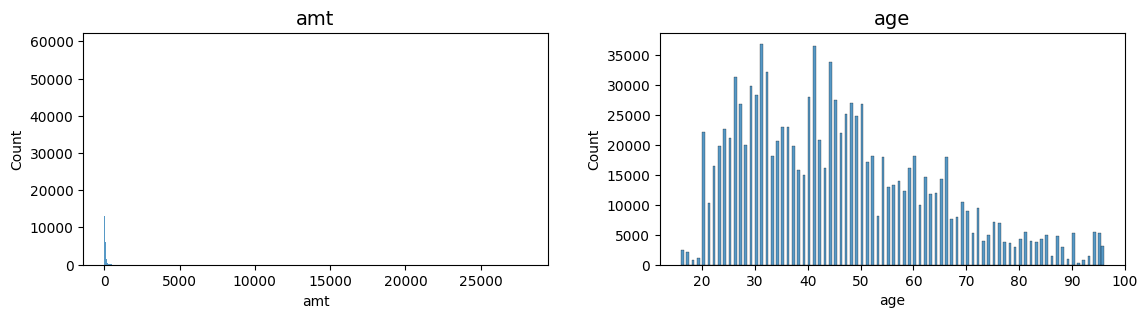

In [59]:
df_numeric = df[['amt', 'age']]

plt.figure(figsize=(10, 6))

n_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
fig.tight_layout(pad=5.0)

axs = axs.reshape(-1)

for i, col in enumerate(df_numeric.columns):
    bin_width = 2 * (np.percentile(df_numeric[col], 75) - np.percentile(df_numeric[col], 25)) / (len(df_numeric[col]) ** (1/3))
    num_bins = int(np.ceil((df_numeric[col].max() - df_numeric[col].min()) / bin_width))

    sns.histplot(df_numeric[col], ax=axs[i], bins=num_bins, kde=False)
    axs[i].set_title(col, fontsize=14)

for j in range(i+1, n_rows*n_cols):
    axs[j].set_visible(False)

plt.show()

In [60]:
df.describe(include='all')

,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,transaction_id,gender,city,state,age,job_category
count,1.117411e+06,1117411,1117411,1117411,1.117411e+06,1.117411e+06,1117411,1.117411e+06,1117411,1117411,1117411,1.117411e+06,1117411
unique,NaN,1117411,NaN,14,NaN,NaN,16759,NaN,2,722,51,NaN,10
top,NaN,b45d68c71229562b6fd243d91b97a742,NaN,personal_care,NaN,NaN,Johnson LLC,NaN,F,Brooklyn,CA,NaN,Other
freq,NaN,1,NaN,300630,NaN,NaN,1807,NaN,573517,17433,132575,NaN,1027514
mean,4.914869e+11,NaN,2022-09-21 13:47:15.183780096,NaN,6.427793e+01,1.493631e-03,NaN,6.802466e+01,NaN,NaN,NaN,4.554020e+01,NaN
min,2.348758e+09,NaN,2022-06-01 00:00:08,NaN,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,1.600000e+01,NaN
25%,2.520855e+11,NaN,2022-07-24 08:12:15.500000,NaN,8.200000e+00,0.000000e+00,NaN,4.300000e+01,NaN,NaN,NaN,3.100000e+01,NaN
50%,4.734608e+11,NaN,2022-09-20 11:15:25,NaN,3.315000e+01,0.000000e+00,NaN,6.700000e+01,NaN,NaN,NaN,4.300000e+01,NaN
75%,7.514274e+11,NaN,2022-11-26 10:47:39,NaN,7.636000e+01,0.000000e+00,NaN,1.030000e+02,NaN,NaN,NaN,5.700000e+01,NaN
max,9.993899e+11,NaN,2022-12-31 12:59:42,NaN,2.805851e+04,1.000000e+00,NaN,1.300000e+02,NaN,NaN,NaN,9.600000e+01,NaN


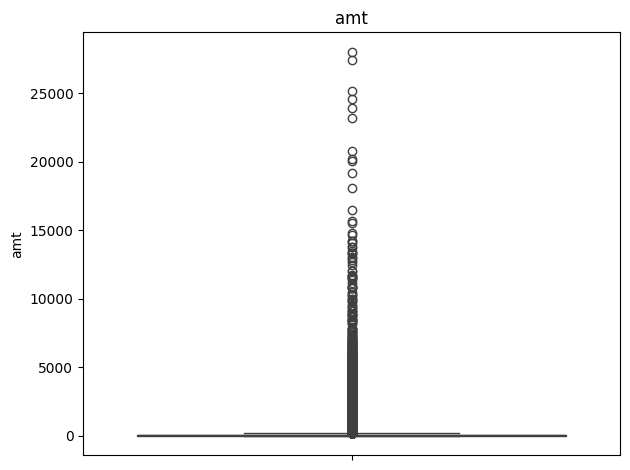

In [61]:
sns.boxplot(y=df[df['amt'] != -1]['amt'])
plt.title('amt')

plt.tight_layout()
plt.show()

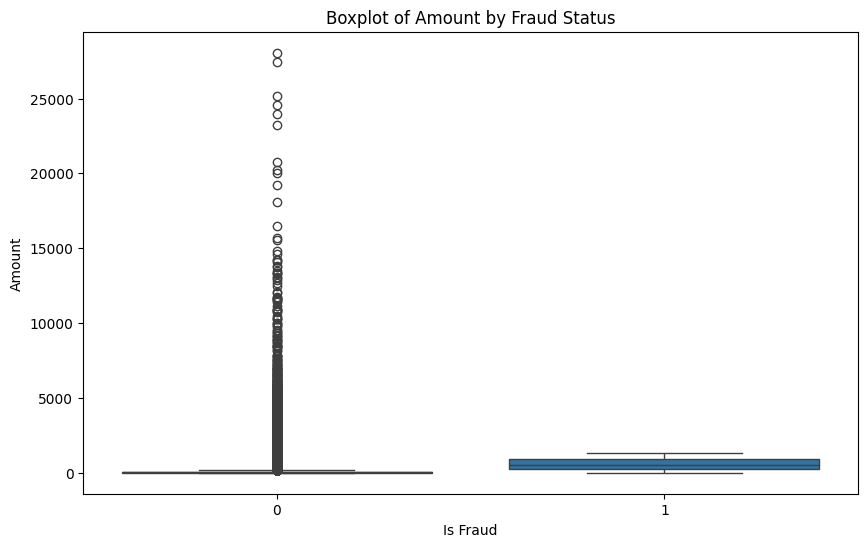

In [62]:
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(data=df, x='is_fraud', y='amt')

# Add labels and title
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.title('Boxplot of Amount by Fraud Status')

plt.show()

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

In [ ]:
target = 'is_fraud'
sns.countplot(data=df, x=target, order=df[target].value_counts().index)
plt.title(f'{target} Distribution')
plt.xticks(rotation=90)

In [ ]:
df.info()

In [ ]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette="muted")
plt.title(f'{col} Distribution')
plt.xticks(rotation=90)

plt.show()

In [ ]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='merchant', order=df['merchant'].value_counts().index, palette="muted")
plt.title(f'{col} Distribution')
plt.xticks(rotation=90)


In [ ]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='city', order=df['city'].value_counts().index, palette="muted")
plt.title('city Distribution')
plt.xticks(rotation=90)


In [ ]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index, palette="muted")
plt.title('gender Distribution')
plt.xticks(rotation=90)


In [ ]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette="muted")
plt.title('state Distribution')
plt.xticks(rotation=90)


In [ ]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette="muted")
plt.title('job Distribution')
plt.xticks(rotation=90)
